In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
import seaborn as sb


In [34]:
df=pd.read_csv('https://raw.githubusercontent.com/tmsllab/datasets/refs/heads/main/salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [35]:
#describing the data
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


/tmp/ipykernel_7860/358220015.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['Salary']);


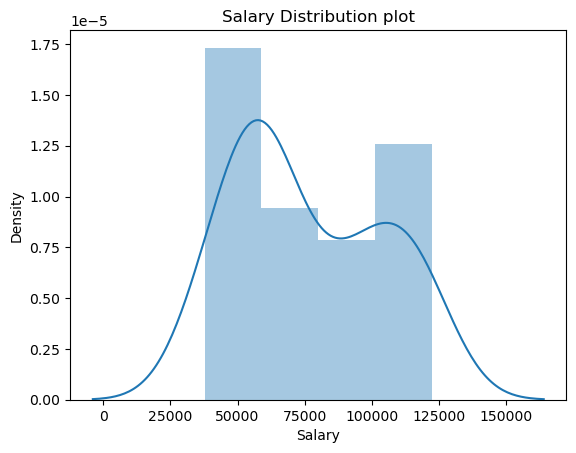

In [36]:
#data distribution based on distribution plot
plt.title("Salary Distribution plot");
sb.distplot(df['Salary']);
plt.show()

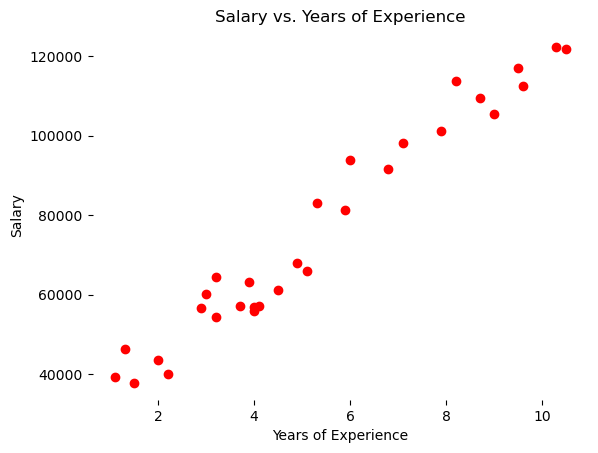

In [37]:
#relationship between Salary and Years of Experience
plt.scatter(df['YearsExperience'],df['Salary'],color='red')
plt.title("Salary vs. Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.box(False)
plt.show()

In [38]:
#FEATURES
X=df.iloc[:,:1] #independent feature here YearsExperience column
y=df.iloc[:,1:] #dependent feature here Salary column
print(X)
print(y)


    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5
      Salary
0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
5    56642.0
6    60150.0
7    54445.0
8    64445.0
9    57189.0
10   63218.0
11   55794.0
12   56957.0
13   57081.0
14   61111.0
15   67938.0
16   66029.0
17   83088.0
18   81363.0
19   93940.0
20   91738.0
21   98273.0
22  101302.0
23  113812.0
24  109431.0
25  105582.0
26  116969.0
27  112635.0
28 

In [53]:
#train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=0)
print(train_X)
print(test_X)
print(train_y)
print(test_y)

    YearsExperience
27              9.6
11              4.0
17              5.3
22              7.9
5               2.9
16              5.1
8               3.2
14              4.5
23              8.2
20              6.8
1               1.3
29             10.5
6               3.0
4               2.2
18              5.9
19              6.0
9               3.7
7               3.2
25              9.0
3               2.0
0               1.1
21              7.1
15              4.9
12              4.0
    YearsExperience
2               1.5
28             10.3
13              4.1
10              3.9
26              9.5
24              8.7
      Salary
27  112635.0
11   55794.0
17   83088.0
22  101302.0
5    56642.0
16   66029.0
8    64445.0
14   61111.0
23  113812.0
20   91738.0
1    46205.0
29  121872.0
6    60150.0
4    39891.0
18   81363.0
19   93940.0
9    57189.0
7    54445.0
25  105582.0
3    43525.0
0    39343.0
21   98273.0
15   67938.0
12   56957.0
      Salary
2    37731.0
28  12239

In [54]:
#train the regression model
regressor=LinearRegression()
regressor.fit(train_X,train_y)

LinearRegression()

In [55]:
#prediction result
y_pred_test=regressor.predict(test_X)
y_pred_train=regressor.predict(train_X)
print(y_pred_test)
print(y_pred_train)

[[ 40748.96184072]
 [122699.62295594]
 [ 64961.65717022]
 [ 63099.14214487]
 [115249.56285456]
 [107799.50275317]]
[[116180.82036723]
 [ 64030.39965754]
 [ 76136.74732229]
 [100349.44265179]
 [ 53786.56701814]
 [ 74274.23229695]
 [ 56580.33955616]
 [ 68686.68722091]
 [103143.21518981]
 [ 90105.61001239]
 [ 38886.44681538]
 [124562.13798128]
 [ 54717.82453082]
 [ 47267.76442943]
 [ 81724.29239833]
 [ 82655.549911  ]
 [ 61236.62711953]
 [ 56580.33955616]
 [110593.27529119]
 [ 45405.24940409]
 [ 37023.93179003]
 [ 92899.38255041]
 [ 72411.7172716 ]
 [ 64030.39965754]]


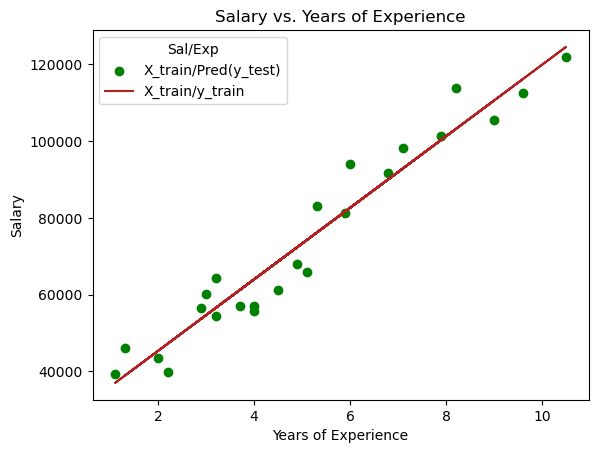

In [56]:
#plotting and prediction on training set
plt.scatter(train_X,train_y,color='green')
plt.plot(train_X,y_pred_train,color='firebrick')
plt.title("Salary vs. Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend(['X_train/Pred(y_test)','X_train/y_train'],title='Sal/Exp',loc='best',facecolor='white')
plt.show()

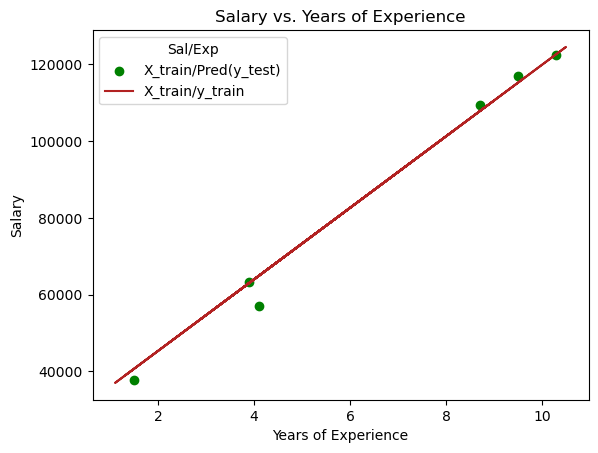

In [57]:
#plotting and prediction on test data set
plt.scatter(test_X,test_y,color='green')
plt.plot(train_X,y_pred_train,color='firebrick')
plt.title("Salary vs. Years of Experience")
plt.xlabel("Years of Experience")
plt.legend(['X_train/Pred(y_test)','X_train/y_train'],title='Sal/Exp',loc='best',facecolor='white')
plt.ylabel("Salary")
plt.show()

In [58]:
print(f'Coefficient:{regressor.coef_}')
print(f'intercept:{regressor.intercept_}')

Coefficient:[[9312.57512673]]
intercept:[26780.09915063]


In [59]:
#mean squared error
mse=mean_squared_error(test_y,y_pred_test)
rmse=np.sqrt(mse);
print(f"mean_squared_error:{mse}")
print(f"root_mean_squared_error:{rmse}")

mean_squared_error:12823412.298126549
root_mean_squared_error:3580.979237321343


In [61]:
score = r2_score(test_y,y_pred_test)
print(score)

0.988169515729126
